# House Prices Regression

My revisiting of a basic Kaggle competition, using all the techniques I have learned in MMA.

Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Load Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

# Some config

In [ ]:
#plt.rcdefaults()
# I like whitegrid style
sns.set_style('whitegrid')

# Diverging palette for heatmaps
dpal = sns.diverging_palette(220, 10, as_cmap = True)

# Increases maximum rows shown, clutters the screen but helps when you want to review a bunch of features for example with the info() method
pd.set_option('display.max_rows', 100)

# I like square graphs
plt.rcParams["figure.figsize"] = (10,10)

# Load Data

In [ ]:
dat = pd.read_csv('/content/drive/My Drive/DS Projects/Housing/train.csv')

# Exploration

In [ ]:
dat.shape

(1460, 81)

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dat.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dat.isnull().sum().sum()

6965

In [ ]:
nulls = dat.isnull().sum()
nulls[nulls.values > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
dat.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## Graphs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


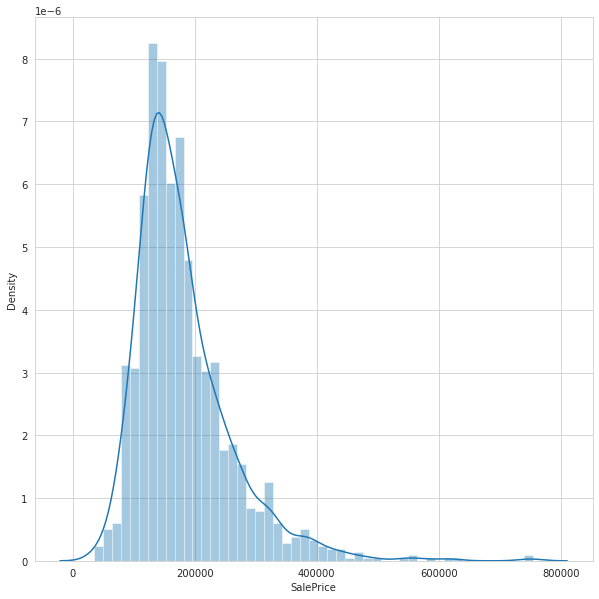

In [ ]:
plt.figure(figsize=(10,10), facecolor='white')
sns.distplot(dat['SalePrice'])
plt.show()

Note the few outliers north of $500,000. These could skew the model so we might attempt something without them.

In [ ]:
len(dat[dat['SalePrice'] > 500000].index)

9

There are only 9 instances soooooooooooo....

CPU times: user 923 ms, sys: 127 ms, total: 1.05 s
Wall time: 964 ms


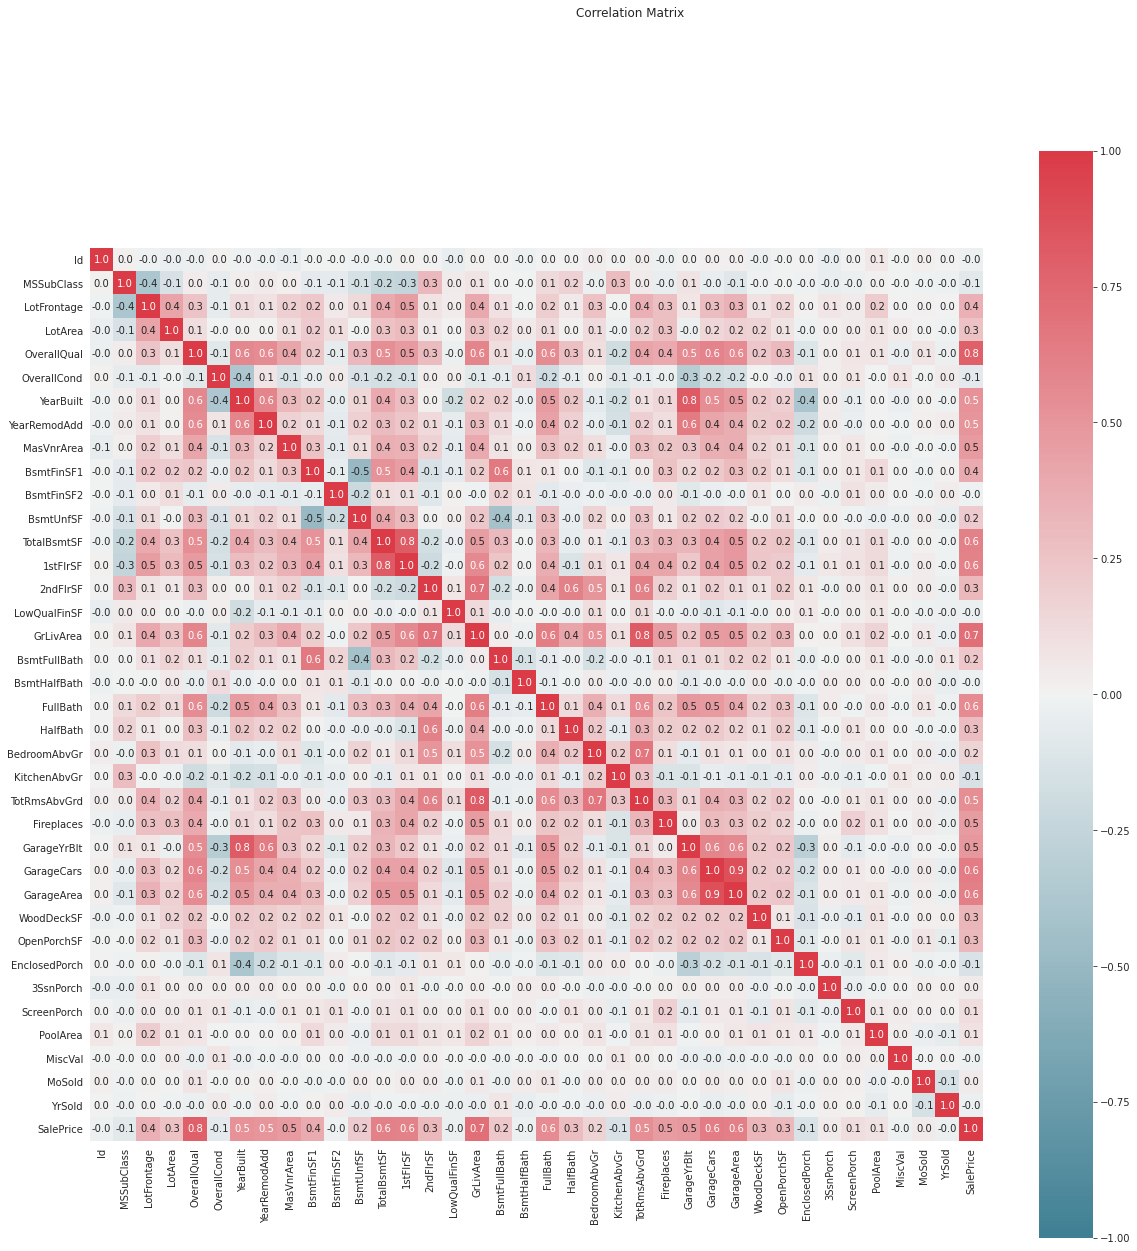

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
%time sns.heatmap(dat.corr(), cmap = dpal, square = True, annot = True, fmt = '.1f', vmin = -1, vmax = 1)
plt.suptitle('Correlation Matrix')
plt.show()

$x = y$

# Preprocessing

## Remove Outliers

In [ ]:
dat = dat[dat['SalePrice'] < 500000].copy()

## Deal with Missing Values

In [ ]:
nulls = dat.isnull().sum()
nulls[nulls.values > 0]

LotFrontage      259
Alley           1360
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1445
Fence           1171
MiscFeature     1397
dtype: int64

In [ ]:
dat[dat['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,...,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [ ]:
dat['MasVnrType'].nunique()

4

In [ ]:
dat02 = dat.fillna(value = {'LotFrontage':  0,
                            'Alley':        'No Alley Access',
                            'MasVnrType':   'None',
                            'MasVnrArea':   0,
                            'BsmtQual':     'No Basement',
                            'BsmtCond':     'No Basement',
                            'BsmtExposure': 'No Basement',
                            'BsmtFinType1': 'No Basement',
                            'BsmtFinType2': 'No Basement',
                            'Electrical':   'Mixed',
                            'FireplaceQu':  'No Fireplace',
                            'GarageType':   'No Garage',
                            'GarageYrBlt':  'No Garage',
                            'GarageFinish': 'No Garage',
                            'GarageQual':   'No Garage',
                            'GarageCond':   'No Garage',
                            'PoolQC':       'No Pool',
                            'Fence':        'No Fence',
                            'MiscFeature':  'None'})

In [ ]:
dat02.isnull().sum().sum()

0

We did it Reddit! No missing values!

## Typecasting

Scanning the features there is only `MsSubClass` which should be typecasted into categorical (since the numbers are just code for different things), we will just replace that feature only.

In [ ]:
dat03 = dat02.astype({'MSSubClass': 'category'})

In [ ]:
dat03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1451 non-null   int64   
 1   MSSubClass     1451 non-null   category
 2   MSZoning       1451 non-null   object  
 3   LotFrontage    1451 non-null   float64 
 4   LotArea        1451 non-null   int64   
 5   Street         1451 non-null   object  
 6   Alley          1451 non-null   object  
 7   LotShape       1451 non-null   object  
 8   LandContour    1451 non-null   object  
 9   Utilities      1451 non-null   object  
 10  LotConfig      1451 non-null   object  
 11  LandSlope      1451 non-null   object  
 12  Neighborhood   1451 non-null   object  
 13  Condition1     1451 non-null   object  
 14  Condition2     1451 non-null   object  
 15  BldgType       1451 non-null   object  
 16  HouseStyle     1451 non-null   object  
 17  OverallQual    1451 non-null   in

Noice.

## Remove ID

Finally we can remove the ID column.

In [ ]:
# Using inplace because I'm lazy, don't do this kids!
dat03.drop('Id', axis = 1, inplace = True)

# More Visualizations

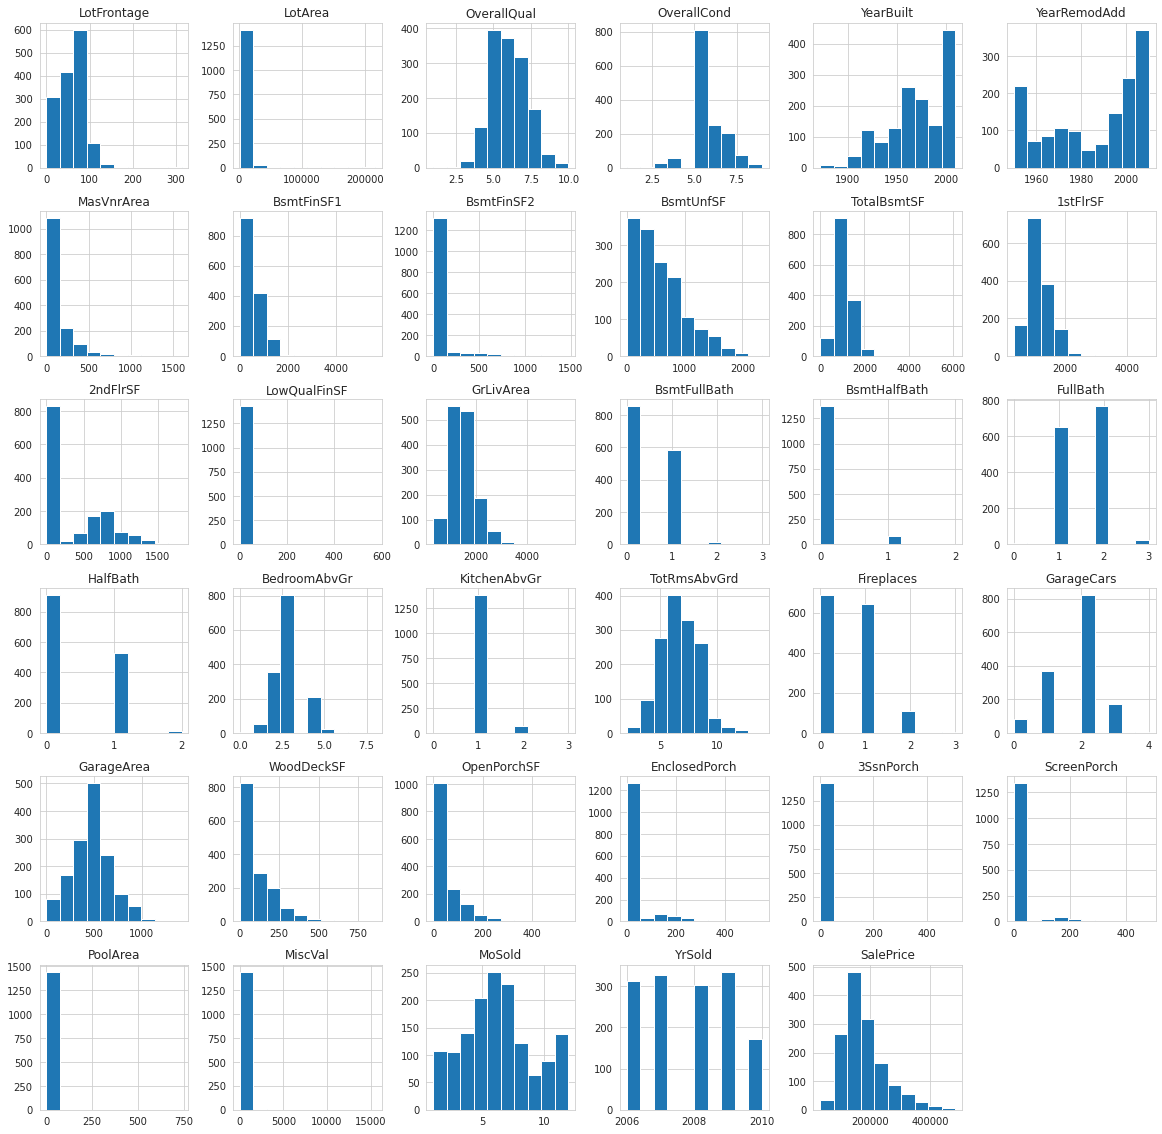

In [ ]:
dat03.hist(figsize = (20,20))
plt.show()

# Split Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = pd.get_dummies(dat03.drop('SalePrice', axis = 1), drop_first = True)
y = dat03['SalePrice'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Let's train some models!

Load `cross_validate` for cross validation

In [ ]:
from sklearn.model_selection import cross_validate

## Linear Regression

The most basic model of all.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.score(X_train, y_train)

0.9463231640330086

**Note:** above number is $R^2$.

In [ ]:
%time lin_cv_scores = cross_validate(lin_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

print('Linear Regression CV RMSE:\nMean: {}\nStandard Deviation: {}'
      .format(str(lin_cv_scores['test_score'].mean()),
              str(lin_cv_scores['test_score'].std())))

CPU times: user 1.11 s, sys: 1.32 s, total: 2.43 s
Wall time: 1.3 s
Linear Regression CV RMSE:
Mean: -46081.956599162186
Standard Deviation: 21950.36129840124


In [ ]:
'''%time lin_cv_scores = cross_validate(lin_reg, X_train, y_train, scoring = 'r2', cv = 10)

print('Linear Regression CV R2:\nMean: {}\nStandard Deviation: {}'
      .format(str(lin_cv_scores['test_score'].mean()),
              str(lin_cv_scores['test_score'].std())))'''

"%time lin_cv_scores = cross_validate(lin_reg, X_train, y_train, scoring = 'r2', cv = 10)\n\nprint('Linear Regression CV R2:\nMean: {}\nStandard Deviation: {}'\n      .format(str(lin_cv_scores['test_score'].mean()),\n              str(lin_cv_scores['test_score'].std())))"

Damn that is pathetic.

### Diagnostic Charts

If this works out I might put them in functions and use for future projects.

#### Feature Coefficients

In [ ]:
pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lin_reg.coef_}).sort_values(by = 'Coefficient', ascending = False)

,Feature,Coefficient
125,RoofMatl_Metal,629866.559688
129,RoofMatl_WdShngl,618291.341267
127,RoofMatl_Tar&Grv,609537.577126
123,RoofMatl_CompShg,602426.041905
128,RoofMatl_WdShake,597386.345655
...,...,...
134,Exterior1st_CemntBd,-36119.026052
130,Exterior1st_AsphShn,-36232.497954
368,SaleCondition_Partial,-71937.044070
341,GarageCond_Po,-85232.094804


#### Residuals vs. Fitted
This seems simple enough, just fitted on x-axis and residuals on y-axis, we just need the two of them and draw a scatterplot I suppose.

In [ ]:
lin_reg_pred = lin_reg.predict(X_train)
lin_reg_residuals = lin_reg_pred - y_train

Using `seaborn.regplot()` for this, if I were hardcore I would code my own LOWESS and put it on the graph. Maybe some other time.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


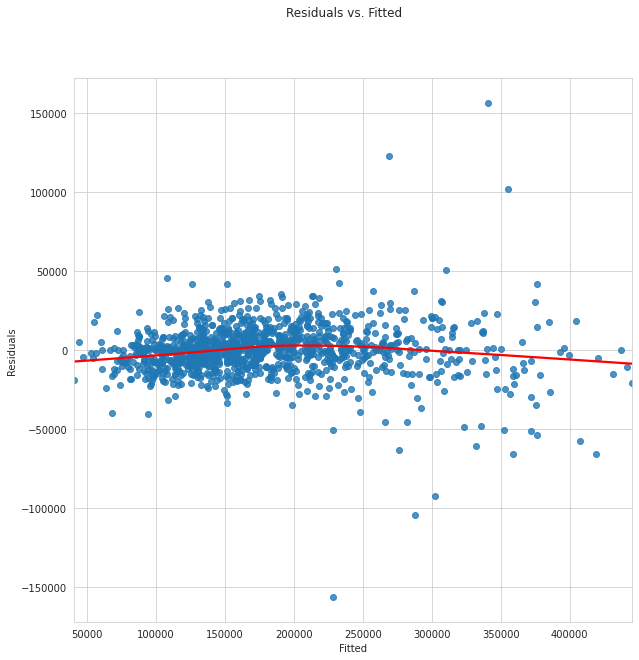

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x = lin_reg_pred, y = lin_reg_residuals, lowess = True, line_kws = {'color': 'red'})
plt.suptitle('Residuals vs. Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

While typing in `plt.xlabel`, I found that there is a `plt.xkcd()`. Interesting...

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


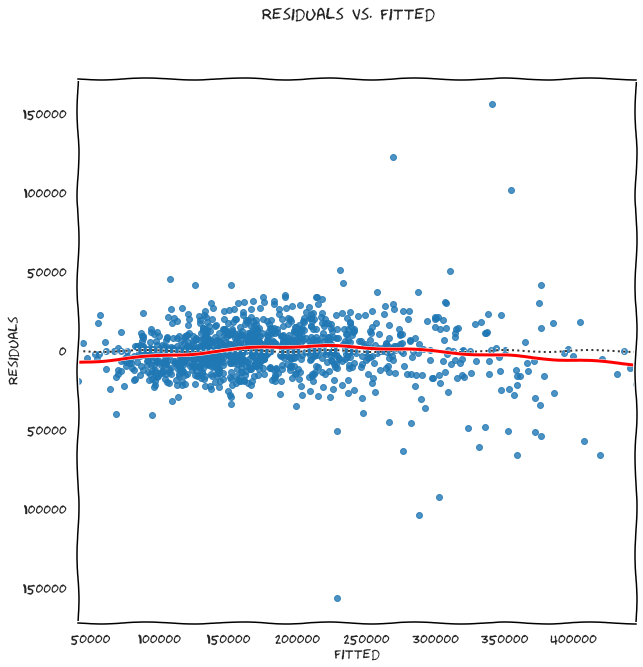

In [ ]:
with plt.xkcd():
    plt.figure(figsize = (10,10))
    sns.residplot(x = lin_reg_pred, y = lin_reg_residuals, lowess = True, line_kws = {'color': 'red'})
    plt.suptitle('Residuals vs. Fitted')
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')

plt.show()

In [ ]:
'''plt.figure(figsize = (10,10))
sns.scatterplot(x = lin_reg_pred, y = lin_reg_residuals)
plt.show()'''

pass

#### Normal Q-Q

This will be quite a bit harder, need some Google-fu...

In [ ]:
from scipy.stats import zscore, probplot

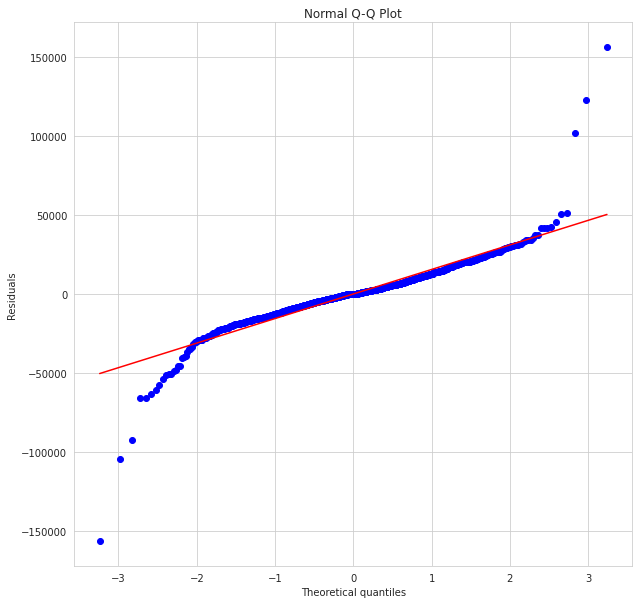

In [ ]:
# We can just draw a probplot like so NOTE the red line is a best fit line not the 45 degree line.

fig, ax = plt.subplots()
probplot(lin_reg_residuals, plot = plt)
ax.set_title('Normal Q-Q Plot')
ax.set_ylabel('Residuals')
plt.show()

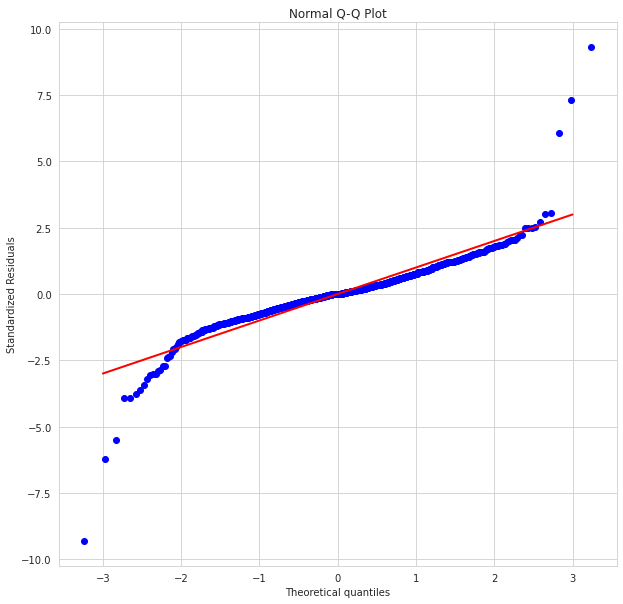

In [ ]:
# or we can standardize the residuals and do the same

fig, ax = plt.subplots()
probplot(zscore(lin_reg_residuals), fit = False, plot = ax)
ax.set_title('Normal Q-Q Plot')
ax.set_ylabel('Standardized Residuals')

# Manually remove the best fit line and draw our own 45 degree line
ax.get_lines()[1].remove()
ax.plot([-3, 3], [-3, 3], color = 'red', linewidth = 2)

plt.show()

Looks like we have a bunch of outliers on either end. A look at the KDE tells us the same thing.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


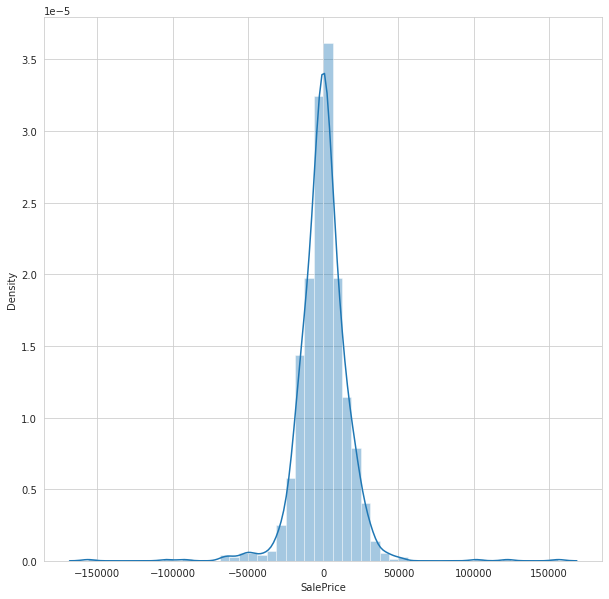

In [ ]:
sns.distplot(lin_reg_residuals)
plt.show()

#### Scale-Location Plot

Used to check for heteroskedasticity.

Every stats professor in the world: "haha homoskedasticity is such a funny word!"

Also I've been looking for why the y-axis has to be `sqrt(abs(zscore(residuals)))`. I understand what absolute value is for. So far the most clear answer is:

> The absolute value transforms all the residuals into a magnitude scale (removing direction) and the square-root helps you see differences in variability more accurately. ([Source](https://arc.lib.montana.edu/book/statistics-with-r-textbook/item/57))

In [ ]:
lin_reg_sqrt_abs_std_residuals = np.sqrt(np.abs(zscore(lin_reg_residuals)))

In [ ]:
lin_reg_sqrt_abs_std_residuals.min()

9.608835895949317e-07

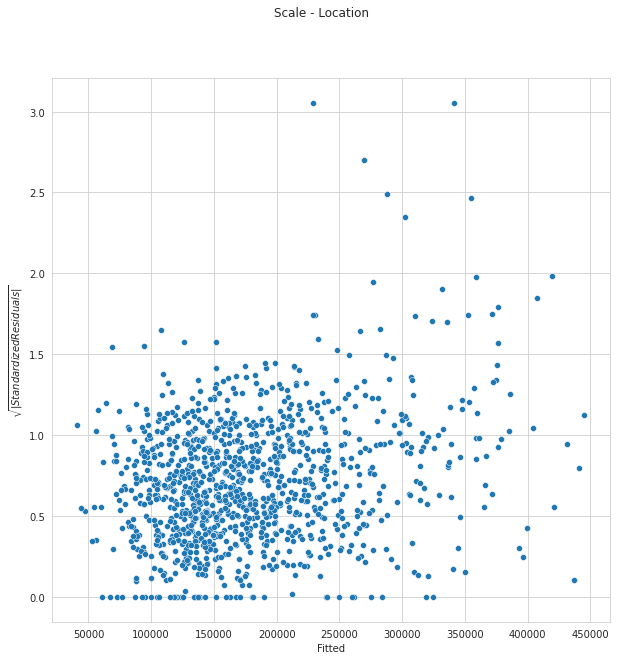

In [ ]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x = lin_reg_pred, y = lin_reg_sqrt_abs_std_residuals)
plt.suptitle('Scale - Location')
plt.xlabel('Fitted')
plt.ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()

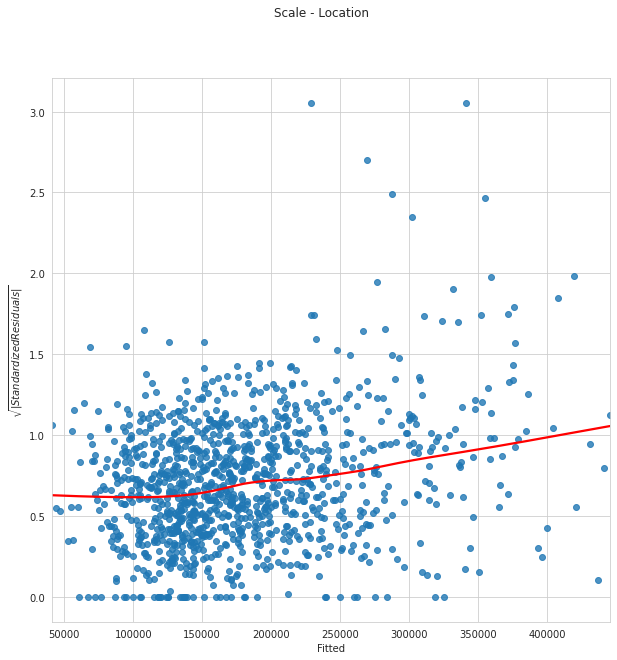

In [ ]:
sns.regplot(x = lin_reg_pred, y = lin_reg_sqrt_abs_std_residuals, lowess = True, line_kws={'color': 'red'})
plt.suptitle('Scale - Location')
plt.xlabel('Fitted')
plt.ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()

#### Residuals vs. Leverage (Cook's Distance Plot)

In [ ]:
# Need more research

In [ ]:
!pip install --upgrade yellowbrick
from yellowbrick.regressor import CooksDistance

     |████████████████████████████████| 276kB 6.0MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


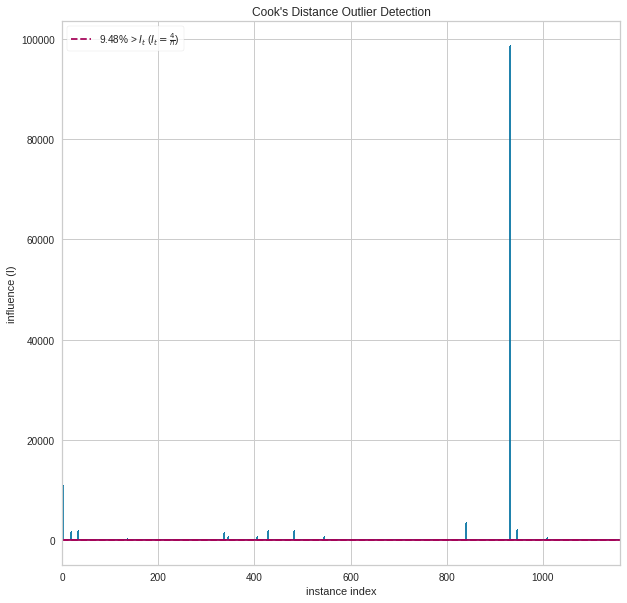

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
visualizer = CooksDistance(ax = ax)
visualizer.fit(X_train, y_train)
visualizer.finalize()
plt.show()

## Linear Regression with regularization

### Ridge

now with built-in CV!

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_reg = RidgeCV(alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1], cv = None, store_cv_values = True)
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=True)

In [ ]:
ridge_reg.score(X_train, y_train)

0.9280441069453016

In [ ]:
ridge_reg.cv_values_

array([[2.18856764e+08, 2.15858481e+08, 1.87906336e+08, 8.99672060e+07,
        3.18007962e+07],
       [4.90078088e+07, 4.05604163e+07, 8.79827496e+06, 1.68368710e+06,
        1.96748722e+06],
       [2.36509147e+09, 1.53277224e+09, 1.89405609e+08, 7.66434644e+07,
        2.34154833e+08],
       ...,
       [5.68194118e+07, 5.75152198e+07, 6.25590587e+07, 6.69225602e+07,
        3.03919210e+07],
       [3.64568559e+07, 3.85051985e+07, 5.44927666e+07, 1.09081633e+08,
        1.56116398e+08],
       [3.56663016e+07, 3.60850767e+07, 3.97114661e+07, 5.73279225e+07,
        7.14197459e+07]])

In [ ]:
X_train.shape

(1160, 369)

Let's practice creating CV graphs

In [ ]:
ridge_ncv_values = pd.DataFrame(ridge_reg.cv_values_)
ridge_ncv_values.mean()

0    1.812937e+09
1    1.768100e+09
2    1.528442e+09
3    1.183789e+09
4    1.018707e+09
dtype: float64

In [ ]:
ridge_ncv_medians = pd.DataFrame({'alphas': [1e-4, 1e-3, 1e-2, 1e-1, 1],
                                  'MSE':    ridge_ncv_values.mean()})

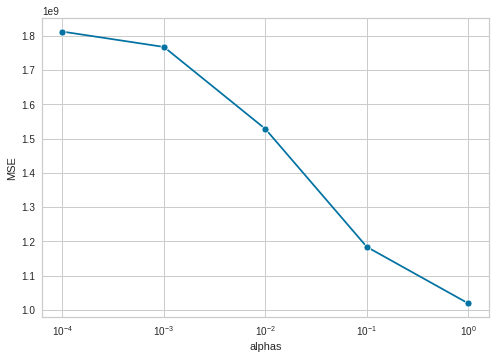

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x = 'alphas', y = 'MSE', data = ridge_ncv_medians, marker = 'o', palette = 'Set2')
#ax.plot('alphas', 'RMSE', data = ridge_ncv_medians)
ax.set_xscale('log')
plt.show()

In [ ]:
ridge_reg.alpha_

1.0

In [ ]:
%time ridge_cv_scores = cross_validate(ridge_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

print('Ridge Regression CV RMSE:\nMean: {}\nStandard Deviation: {}'
      .format(str(ridge_cv_scores['test_score'].mean()),
              str(ridge_cv_scores['test_score'].std())))

CPU times: user 2.03 s, sys: 1.53 s, total: 3.56 s
Wall time: 1.86 s
Ridge Regression CV RMSE:
Mean: -34496.65881442463
Standard Deviation: 15182.641049699287


In [ ]:
'''%time ridge_cv_scores = cross_validate(ridge_reg, X_train, y_train, scoring = 'r2', cv = 10)

print('Ridge Regression CV R2:\nMean: {}\nStandard Deviation: {}'
      .format(str(ridge_cv_scores['test_score'].mean()),
              str(ridge_cv_scores['test_score'].std())))'''

"%time ridge_cv_scores = cross_validate(ridge_reg, X_train, y_train, scoring = 'r2', cv = 10)\n\nprint('Ridge Regression CV R2:\nMean: {}\nStandard Deviation: {}'\n      .format(str(ridge_cv_scores['test_score'].mean()),\n              str(ridge_cv_scores['test_score'].std())))"

### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
enet_reg = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
enet_reg.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [ ]:
%time enet_cv_scores = cross_validate(enet_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

print('ElasticNet Regression CV RMSE:\nMean: {}\nStandard Deviation: {}'
      .format(str(enet_cv_scores['test_score'].mean()),
              str(enet_cv_scores['test_score'].std())))

CPU times: user 26.5 s, sys: 18 s, total: 44.5 s
Wall time: 22.9 s
ElasticNet Regression CV RMSE:
Mean: -39793.58043248092
Standard Deviation: 10672.226555969311


In [ ]:
'''%time enet_cv_scores = cross_validate(enet_reg, X_train, y_train, scoring = 'r2', cv = 10)

print('ElasticNet Regression CV R2:\nMean: {}\nStandard Deviation: {}'
      .format(str(enet_cv_scores['test_score'].mean()),
              str(enet_cv_scores['test_score'].std())))'''

"%time enet_cv_scores = cross_validate(enet_reg, X_train, y_train, scoring = 'r2', cv = 10)\n\nprint('ElasticNet Regression CV R2:\nMean: {}\nStandard Deviation: {}'\n      .format(str(enet_cv_scores['test_score'].mean()),\n              str(enet_cv_scores['test_score'].std())))"

## Tree Models

Since regression doesn't seem to fare too well, let's look at tree models.

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
forest_reg.score(X_train, y_train)

0.9818727424693315

In [ ]:
%time forest_cv_scores = cross_validate(forest_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

print('RandomForest CV RMSE:\nMean: {}\nStandard Deviation: {}'
      .format(str(forest_cv_scores['test_score'].mean()),
              str(forest_cv_scores['test_score'].std())))

CPU times: user 27.7 s, sys: 56.1 ms, total: 27.8 s
Wall time: 27.7 s
RandomForest CV RMSE:
Mean: -26024.592358673297
Standard Deviation: 3858.3506909322355


In [ ]:
'''%time forest_cv_scores = cross_validate(forest_reg, X_train, y_train, scoring = 'r2', cv = 10)

print('RandomForest CV R2:\nMean: {}\nStandard Deviation: {}'
      .format(str(forest_cv_scores['test_score'].mean()),
              str(forest_cv_scores['test_score'].std())))'''

"%time forest_cv_scores = cross_validate(forest_reg, X_train, y_train, scoring = 'r2', cv = 10)\n\nprint('RandomForest CV R2:\nMean: {}\nStandard Deviation: {}'\n      .format(str(forest_cv_scores['test_score'].mean()),\n              str(forest_cv_scores['test_score'].std())))"

### Gradient Boosted Trees

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
boost_reg = GradientBoostingRegressor()
boost_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
boost_reg.score(X_train, y_train)

0.966230072271222

In [ ]:
%time boost_cv_scores = cross_validate(boost_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

print('GBoost CV RMSE:\nMean: {}\nStandard Deviation: {}'
      .format(str(boost_cv_scores['test_score'].mean()),
              str(boost_cv_scores['test_score'].std())))

CPU times: user 10.2 s, sys: 15.8 ms, total: 10.2 s
Wall time: 10.3 s
GBoost CV RMSE:
Mean: -23806.911650491285
Standard Deviation: 4083.072177561563


In [ ]:
'''%time boost_cv_scores = cross_validate(boost_reg, X_train, y_train, scoring = 'r2', cv = 10)

print('GBoost CV R2:\nMean: {}\nStandard Deviation: {}'
      .format(str(boost_cv_scores['test_score'].mean()),
              str(boost_cv_scores['test_score'].std())))'''

"%time boost_cv_scores = cross_validate(boost_reg, X_train, y_train, scoring = 'r2', cv = 10)\n\nprint('GBoost CV R2:\nMean: {}\nStandard Deviation: {}'\n      .format(str(boost_cv_scores['test_score'].mean()),\n              str(boost_cv_scores['test_score'].std())))"

## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
%time knn_cv_scores = cross_validate(knn_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

print('KNN CV RMSE:\nMean: {}\nStandard Deviation: {}'
      .format(str(knn_cv_scores['test_score'].mean()),
              str(knn_cv_scores['test_score'].std())))

CPU times: user 713 ms, sys: 10 ms, total: 723 ms
Wall time: 736 ms
KNN CV RMSE:
Mean: -40165.854958495256
Standard Deviation: 2835.167526726628


In [ ]:
'''%time knn_cv_scores = cross_validate(knn_reg, X_train, y_train, scoring = 'r2', cv = 10)

print('KNN CV R2:\nMean: {}\nStandard Deviation: {}'
      .format(str(knn_cv_scores['test_score'].mean()),
              str(knn_cv_scores['test_score'].std())))'''

"%time knn_cv_scores = cross_validate(knn_reg, X_train, y_train, scoring = 'r2', cv = 10)\n\nprint('KNN CV R2:\nMean: {}\nStandard Deviation: {}'\n      .format(str(knn_cv_scores['test_score'].mean()),\n              str(knn_cv_scores['test_score'].std())))"

## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,100))
mlp_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
%time mlp_cv_scores = cross_validate(mlp_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

print('MLP CV RMSE:\nMean: {}\nStandard Deviation: {}'
      .format(str(mlp_cv_scores['test_score'].mean()),
              str(mlp_cv_scores['test_score'].std())))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 1min 20s, sys: 39.3 s, total: 2min
Wall time: 1min 1s
MLP CV RMSE:
Mean: -40935.26553461298
Standard Deviation: 11443.94106661815


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
'''%time mlp_cv_scores = cross_validate(mlp_reg, X_train, y_train, scoring = 'r2', cv = 10)

print('MLP CV R2:\nMean: {}\nStandard Deviation: {}'
      .format(str(mlp_cv_scores['test_score'].mean()),
              str(mlp_cv_scores['test_score'].std())))'''

"%time mlp_cv_scores = cross_validate(mlp_reg, X_train, y_train, scoring = 'r2', cv = 10)\n\nprint('MLP CV R2:\nMean: {}\nStandard Deviation: {}'\n      .format(str(mlp_cv_scores['test_score'].mean()),\n              str(mlp_cv_scores['test_score'].std())))"

## Summary

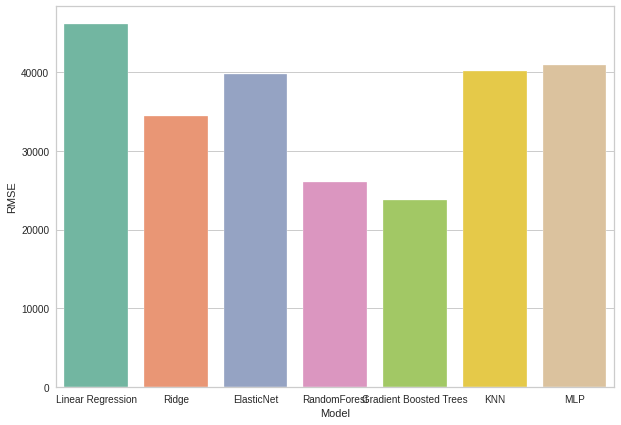

In [ ]:
mvp_scores = pd.DataFrame({'Model': ['Linear Regression', 'Ridge', 'ElasticNet', 'RandomForest', 'Gradient Boosted Trees', 'KNN', 'MLP'],
                           'RMSE':  [-lin_cv_scores['test_score'].mean(), -ridge_cv_scores['test_score'].mean(), -enet_cv_scores['test_score'].mean(), -forest_cv_scores['test_score'].mean(),
                                     -boost_cv_scores['test_score'].mean(), -knn_cv_scores['test_score'].mean(), -mlp_cv_scores['test_score'].mean()]})

plt.figure(figsize = (10,7))
sns.barplot(x='Model', y='RMSE', data = mvp_scores, palette = 'Set2')
plt.show()

# Hyperparameter Tuning

First load the `cross_validate()` function

In [ ]:
from sklearn.model_selection import cross_validate, validation_curve, GridSearchCV

## Linear Regression

Linear regression doesn't have hyperparameters, duh!

## Ridge
Already done above.

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
%%time

enet_tune_reg_01 = ElasticNet(alpha = 1)
enet_tune_reg_01_scores = pd.DataFrame(validation_curve(enet_tune_reg_01, X_train, y_train, 'l1_ratio', [0, 0.2, 0.4, 0.6, 0.8, 1], scoring = 'neg_root_mean_squared_error')[1])

enet_tune_reg_0_1 = ElasticNet(alpha = 0.1)
enet_tune_reg_0_1_scores = pd.DataFrame(validation_curve(enet_tune_reg_0_1, X_train, y_train, 'l1_ratio', [0, 0.2, 0.4, 0.6, 0.8, 1], scoring = 'neg_root_mean_squared_error')[1])

enet_tune_reg_10 = ElasticNet(alpha = 10)
enet_tune_reg_10_scores = pd.DataFrame(validation_curve(enet_tune_reg_10, X_train, y_train, 'l1_ratio', [0, 0.2, 0.4, 0.6, 0.8, 1], scoring = 'neg_root_mean_squared_error')[1])

enet_tune_reg_0_01 = ElasticNet(alpha = 0.01)
enet_tune_reg_0_01_scores = pd.DataFrame(validation_curve(enet_tune_reg_0_01, X_train, y_train, 'l1_ratio', [0, 0.2, 0.4, 0.6, 0.8, 1], scoring = 'neg_root_mean_squared_error')[1])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545518002377.97015, tolerance: 479205276.48288965
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524296588818.1941, tolerance: 479205276.48288965
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492475384609.3818, tolerance: 479205276.48288965
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43583288

CPU times: user 1min 4s, sys: 36.6 s, total: 1min 41s
Wall time: 53.7 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121045885500.69913, tolerance: 469388627.2665223
  positive)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


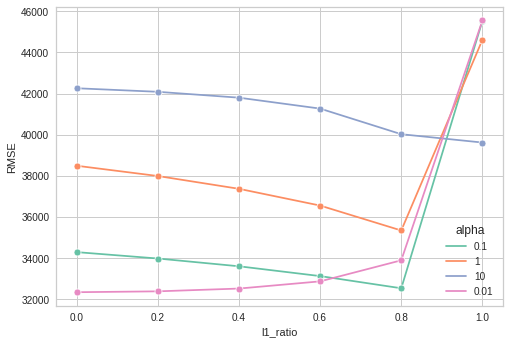

In [ ]:
enet_tune_reg_means = pd.melt(pd.DataFrame({'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                       '1': -enet_tune_reg_01_scores.mean(axis=1),
                                       '0.1': -enet_tune_reg_0_1_scores.mean(axis=1),
                                       '10': -enet_tune_reg_10_scores.mean(axis=1),
                                       '0.01': -enet_tune_reg_0_01_scores.mean(axis=1)}),
                              id_vars = 'l1_ratio',
                              value_vars = ['0.1', '1', '10', '0.01'],
                              var_name='alpha', value_name='RMSE')

#pd.melt(df, id_vars=['A'], value_vars=['B'])

plt.figure()
sns.lineplot('l1_ratio', 'RMSE', data = enet_tune_reg_means, hue = 'alpha', palette = 'Set2', marker = 'o')
plt.show()

## RandomForest

In [ ]:
forest_tune_reg = RandomForestRegressor()

CPU times: user 19 s, sys: 59.3 ms, total: 19 s
Wall time: 19.1 s


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


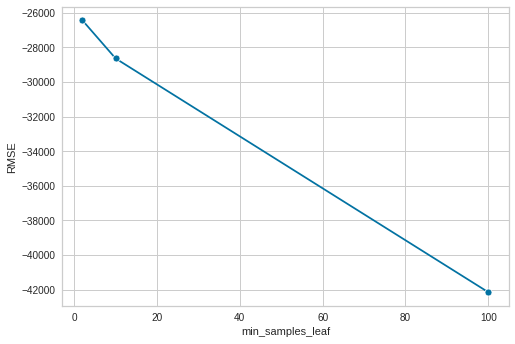

In [ ]:
%time forest_tune_01_scores = pd.DataFrame({'min_samples_leaf': [2, 10, 100], 'RMSE': (pd.DataFrame(validation_curve(forest_tune_reg, X_train, y_train, 'min_samples_leaf', [2,10,100], scoring = 'neg_root_mean_squared_error')[1]).mean(axis=1))})

plt.figure()
sns.lineplot('min_samples_leaf', 'RMSE', data = forest_tune_01_scores, palette = 'Set2', marker = 'o')
plt.show()

In [ ]:
forest_cv = GridSearchCV(forest_tune_reg,
                         param_grid = {'min_samples_split': [2, 20, 200],
                                       'min_samples_leaf': [1,10,100]},
                         scoring = 'neg_root_mean_squared_error')
forest_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
forest_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)